In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_dir = 'results/'

In [3]:
data = pd.read_csv(data_dir + 'GwasCat_associations.r2020-05-03.parsed.csv.gz')

In [4]:
data.head()

,categoria_fenotipo,fenotipo,crom,pos,genes_reportados,genes_mapeados,alelo_riesgo,contexto,es_intergenico,frec_alelo_riesgo,p_value,OR_or_beta,conf_int_95,EFO_URI
0,Digestive system disorder,Crohn's disease,10,6060049,IL2RA,IL2RA,rs12722489-C,intron_variant,False,0.852,3E-9,1.11,[1.05-1.16],http://www.ebi.ac.uk/efo/EFO_0000384
1,Digestive system disorder,Crohn's disease,16,28479196,"IL27, SH2B1, EIF3C, LAT, CD19","CLN3, AC138894.1",rs151181-G,intron_variant,False,0.386,2E-11,1.07,[1.03-1.12],http://www.ebi.ac.uk/efo/EFO_0000384
2,Digestive system disorder,Crohn's disease,1,67240275,IL23R,IL23R,rs11209026-G,missense_variant,False,0.932,1E-64,2.66,[2.36-3.00],http://www.ebi.ac.uk/efo/EFO_0000384
3,Digestive system disorder,Crohn's disease,2,102437989,"IL12RL2, IL18R1, IL1RL1, IL18RAP",IL18RAP,rs2058660-G,intron_variant,False,0.231,2E-12,1.19,[1.14-1.26],http://www.ebi.ac.uk/efo/EFO_0000384
4,Digestive system disorder,Crohn's disease,5,159360377,IL12B,AC008691.1,rs6556412-A,intron_variant,False,0.332,5E-14,1.18,[1.13-1.24],http://www.ebi.ac.uk/efo/EFO_0000384


In [5]:
data.shape

(185724, 14)

Seleccionamos aquellas instancias que tienen en la columna `alelo_riesgo` un SNP.

In [6]:
mask_snps = data.alelo_riesgo.str.match("^rs[0-9]+-[ATCG\?]$")
data = data[mask_snps]
data.shape

(177917, 14)

Miramos y descartamos valores faltantes

In [7]:
data.isna().sum()

categoria_fenotipo       65
fenotipo                  0
crom                   2558
pos                    2558
genes_reportados      20581
genes_mapeados         2558
alelo_riesgo              0
contexto               2548
es_intergenico            0
frec_alelo_riesgo     10608
p_value                   0
OR_or_beta            38474
conf_int_95           41123
EFO_URI                  65
dtype: int64

In [8]:
# data.isna().sum()
data.dropna(subset = ['OR_or_beta'], inplace = True)
data.shape

(139443, 14)

In [9]:
data.isna().sum()

categoria_fenotipo      65
fenotipo                 0
crom                  2061
pos                   2061
genes_reportados      6457
genes_mapeados        2061
alelo_riesgo             0
contexto              2056
es_intergenico           0
frec_alelo_riesgo     5905
p_value                  0
OR_or_beta               0
conf_int_95           2917
EFO_URI                 65
dtype: int64

In [38]:
for column in data.columns:
    print(column)
    print(len(data[column].value_counts()))
    print(data[column].value_counts())

categoria_fenotipo
17
Other measurement                   63834
Lipid or lipoprotein measurement     8456
Hematological measurement            8144
Biological process                   8038
Body measurement                     7638
Neurological disorder                6798
Cancer                               6316
Other trait                          4832
Other disease                        4282
Cardiovascular measurement           3685
Immune system disorder               3649
Response to drug                     3505
Cardiovascular disease               3448
Metabolic disorder                   3006
Digestive system disorder            1904
Inflammatory measurement             1519
Liver enzyme measurement              322
Name: categoria_fenotipo, dtype: int64
fenotipo
3572
Blood protein levels                                    6378
Body mass index                                         3399
Heel bone mineral density                               3288
Metabolite levels           

In [22]:
genes_reportados_counts = data.genes_reportados.value_counts()[3:100]

In [ ]:
plt.figure(figsize = (15,4))
sns.barplot(genes_reportados_counts.index, genes_reportados_counts.values)

plt.xticks(rotation = 90)

In [21]:
data.genes_mapeados[data.es_intergenico].value_counts()[:20]

HERPUD1 - CETP            306
LPL - AC100802.1          270
IGFL1P2 - HIF3A           206
ABO - Y_RNA               175
HLA-DRB1 - HLA-DQA1       174
AC093326.1 - TMEM18       146
CELSR2 - PSRC1            130
PRDM8 - FGF5              129
AC062015.1 - MIR5702      124
HLA-DQB1 - MTCO3P1        110
APOC1 - APOC1P1           100
VEGFA - AL157371.2         96
APOB - AC010872.2          94
CASC20 - LINC01713         88
AC108467.1 - THAP12P9      86
LINC02702 - BUD13          82
DRD2 - TMPRSS5             80
LINC02850 - AC115619.1     78
RNU4-17P - AC090771.1      73
NLRP12 - AC008440.1        69
Name: genes_mapeados, dtype: int64

#### Columna `OR_or_beta`

In [18]:
mask_OR_or_beta_inf = data.OR_or_beta == np.inf
print(data.shape)
data = data[~mask_OR_or_beta_inf]
print(data.shape)

(139443, 14)
(139441, 14)


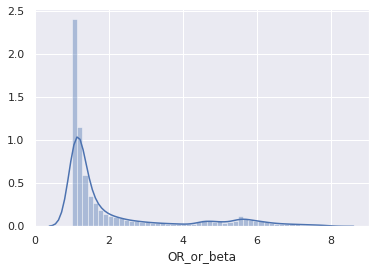

In [37]:
sns.distplot(data.OR_or_beta[(data.OR_or_beta>1) & (data.OR_or_beta<8)])

### Por fenotipo

Seleccionamos un fenotipo particular y vemos como son sus distribuciones




In [39]:
data_fenotipo = data[data.fenotipo == 'Body mass index']
data_fenotipo.shape

(3399, 14)

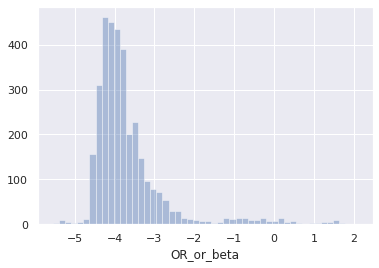

In [53]:
# sns.distplot(data.OR_or_beta[(data.OR_or_beta>1) & (data.OR_or_beta<8)])
# sns.distplot(np.log(data_fenotipo.OR_or_beta[data_fenotipo.OR_or_beta<1]))
# sns.distplot(np.log(data_fenotipo.OR_or_beta[(data_fenotipo.OR_or_beta>=0) & (data_fenotipo.OR_or_beta<8)]), kde = False)
sns.distplot(np.log(data_fenotipo.OR_or_beta), kde = False)

Hipótesis:

Dado un fenotipo, si OR_or_beta solo toma valores mayores a 1, asumimos que ese fenotipo solo tiene ORs.  (ya que es raro reportar OR <1, pero no son raros los betas mayores a 1)

Si no, son betas. No hay mezclados, asumimos criterios de reporte homogéneos, ya que tiene que ver con la naturaleza del fenotipo descripto (existen enfermedades que se tienen o no, mientras que otros fenotipos son continuos). 

Confirmar este criterio mirando un fenotipo que sepamos es binario. ¿Alguna evidencia de que es válido (más de allá mirar un fenotipo)?

Mirar en GWAS catalog si hay alguna descripción.


